In [32]:
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [54]:
## Here are categories that just have one member, is not suited for pw jaccard, merged them with others below and Rerun for "Other"
# Define the categories
gc_ms_groups = {
    "Sugars_Carbohydrates": [
        "Cellobiose_361_204_rt14_40", 
        "raffinose_437_451_rt16_91", 
        "glucose_160_rt9_81", 
        "inositol_myo_305_265_rt10_71", 
        "sucrose_437_361_rt13_77", 
        "hexose_307_217_rt9_58", 
        "glucose_1_phosphate_217_rt9_16", 
        "trehalose_alpha_alpha_191_169_", 
        "fructose_307_217_rt9_48", 
        "glucose_160_319_rt9_68", 
        "galactinol_204_191_rt15_38", 
        "Ribulose_5_phosphate_357_299_1", 
        "glucose_6_phosphate_160_387_rt", 
        "Cellobiose_361_204_or_maltose_", 
        "_6_phospho_gluconate"
    ],
    "Amino_Acids_and_Derivatives": [
        "tyrosine_218_280_rt10_78",
        "serine_204_218_rt5_84", 
        "isoleucin_158_233_rt_5_21", 
        "asparagine_116_188_rt9_00", 
        "ornithine_142_174_rt9_34", 
        "alanine_3_cyano_141_100_rt6_78",
        "arginine_157_256_rt9_92", 
        "threonine_219_291_rt6_01", 
        "tryptophan_202_291_rt12_94", 
        "alanine_116_218_rt3_38", 
        "leucine_158_232_rt4_97", 
        "valine_144_218_rt4_42", 
        "asparagine_188_216_rt7_84", 
        "methionine_176_128_rt7_76", 
        "asparagine_188_216_rt7_45", 
        "lysine_156_174_rt10_07", 
        "glycine_102_147_rt3_70", 
        "aspartic_acid_232_218_rt7_48", 
        "histidine_154_254_rt11_10", 
        "glutamine_156_245_rt9_80", 
        "glycine_174_248_rt_5_31", 
        "homoserine_218_128_rt6_64", 
        "proline_142_130_rt_5_53", 
        "alanine_beta_248_290_rt6_44", 
        "ornithine_142_348_rt8_03"
    ],
    "Nucleotides_and_Derivatives": [
        "adenine_264_279_rt11_12", 
        "adenosine_5_monophosphate_169_"
    ],
    "Organic_Acids": [
        "threonic_acid_292_220_rt7_49", 
        "citric_acid_273_375_rt9_72", 
        "quinic_acid_255_345_rt9_45", 
        "Oxalic_acid_219_147_3_94", 
        "dehydroascorbic_acid_316_173_r", 
        "erythronic_acid_292_rt7_24", 
        "pyroglutamic_acid_156_258_rt8_", 
        "nonanoic_acid_117_215_rt6_19", 
        "malic_acid_233_245_rt7_22", 
        "glyceric_acid_292_189_rt5_63", 
        "butyric_acid_4_amino_174_304_r", 
        "quinic_acid_3_caffeoyl_trans_3", 
        "galactonic_acid_1_4_lacton_217"
    ],
    "Amines_Amides": [
        "dopamine_174_426_rt11_11", 
        "ethanolamine_174_rt4_63", 
        "guanidine_146_171_rt4_33"
    ],
    "Vitamins_and_Cofactors": [
        "nicotinic_acid_180_136_rt6_32", 
        "pantethaine_4_03_220_235"
    ],
   "Others_merged": [
        "phosphoric_acid_314_299_rt_5_4",
        "glycerol_117_205_rt4_75",
        "pyridine_2_hydroxy_152_167_rt3", 
        "inositol_1_phosphate_myo_299_3", 
        "urea_189_204_rt5_56", 
        "glycerol_3_phosphate_357_445_r", 
        "Hydroxylamine_133_3_07_No_need", 
        "glutamic_acid_246_363_rt8_31",
        "beta_Sitosterol_1TMS_129_18_44"
    ]
}
#lcms_cat = {
#    "lcms": []
#}
#lcms_cat['lcms'] = list(lcms_orph.keys())
## Here are categories that just have one member, is not suited for pw jaccard, merged them with others below and Rerun for "Other"

lc_ms_groups = {
    "Amino_Acids_and_Derivatives": [
        "Argininosuccinic_acid_L", "Aspartyphenylalanine_1_L", "gamma_Glutamylisoleucine_", 
        "gamma_Glutamylvaline_", "Glycyl_L_phenylalanine_L", "Histidine_L", 
        "L_gamma_glutamyl_L_isoleucine", "N_gamma_L_Glutamyl_L_methionin", "Phenylalanylglutamic_acid_", 
        "Prolylglycine_L", "Prolyphenylalanine_or_Leucymet", "Tyrosine_L", "Kynurenine_free_base_L", "N_Decanoylglycine_",
        "Phenylalanyaspartatic_acid_L"
    ],
    "Quinic_Acid_Derivatives": [
        "_3_5_dicaffeoul_quinic_acid_L", "_1_3_Dicaffeoylquinic_acid_", "_4_O_p_Coumaroylquinic_acid_", 
        "_4_5_Di_O_caffeoylquinic_acid_", "Coumaroyl_quinic_acid_", "Caffeoylshikimic_acid_L","Quinic_acid_161_05_", 
        "Quinic_acid_derivative_3_56", "Quinic_acid_derivative_with_he"
    ],
    "Phenolic_Compounds": [
        "Caffeic_acid_1_L", "Caffeic_acid_glucoside_L", "Caffeoylglucarate_L", 
        "Chlorogenic_acid_", "Conduritol_B_Epoxide_L", "Dehydro_Ascorbic_acid_L", "Ferulic_acid_4_O_glucuronide_L", 
        "Feruloyl_di_glucoside_L", "Feruloylglucose_L", "Flavonoid_glycoside_", "Galloylglucose_L", 
        "Gentesic_acid_glucoside_L", "Kaempferol_3_O_glucoside_7_O_r", "Kaempferol_3_O_rhamnoside_7_O_", 
        "Kaempferol_3_O_rutinoside_", "Kaempferol_7_3G_glucosylgentio", "Kaempferol_7_O_Glucoside_1_L", 
        "Kaempferol_glucose_xylose_L", "Kaempferol_rhamnose_glucose", "Naringenin_chalcone_L", "p_coumaroyl_di_glucoside_L", 
        "p_coumaroyl_glucoside_L", "Phenolic_glycoside_", "Quercetin_3_7_di_glucoside_", "Quercetin_3_glucoside_3", 
        "Quercetin_7_4_O_diglucoside_", "Quercetin_glc_glc_rha", "Quercetin_glucose_glucose_rham", 
        "Quercetin_glucose", "Quercetin_glucose_xylose", "Quercitin_3_7_diglucoside_6_rh", "Quercitin_3_O_Glucoside_2_L", 
        "Resveratrol_3_4_diglucoside_L", "Sinapoylglucose_2_L", "Sinapoylglucose_L","Catechol_", "_5_Chlorogenic_acid", "chlorgenic_acid_L", 
        "hydroxyjasmonic_acid_glucoside", "Hydroxy_jasmonic_acid_glucosid"
    ],
    "Sugars_and_Sugar_Derivatives": [
        "alpha_D_Galacturonic_acid_1_ph", "alpha_L_Fucose_1_Phosphate", "Dihydrophaseic_acid_glucoside_", 
        "Dihydroxyacetone_phosphate_L", "Fructose_1_6_biosphasphate_L", "Glucaric_acid_1_4_lactone_L", 
        "Gluconic_acid_lactone_L", "Gluconic_acid_L", "Glutamic_acid_L", "Inosine_L", "Isorhamnetin_3_O_glucoside_L", 
        "Isorhamnetin_3_O_rutinoside", "Lactobionic_acid_L", "Maltotriose_", "naringenin_7_O_glucoside_1_L", 
        "naringenin_7_O_glucoside_3_L", "Pantothenic_acid_L", "Phaseoloidin", 
        "Pyroglutamic_acid_3_L", "Ribulose_5_phosphate_L", "Tartaric_acid_L", "Trehalose", 
        "Trehalose_phenolic_acid_", "Vanilloloside", "Vanilloside_L", "Zeatin_glucoside_L", "_1_O_Feruloyl_glucose_L"
    ],
    "Nucleotides_and_Derivatives": [
        "_5_Deoxy_5_Methylthioadenosine", "Guanosine_", "Nicotinamide_adenine_dinucleot", 
        "Oxidized_glutathione_",
    ],
    "Terpenes_and_Triterpenes": [
        "Diterpene_8_2", "Terpene_10_26", "Terpene_9_53", "Triterpene_10_43", "Triterpene_10_78", 
        "Triterpene_8_14", "Triterpene_8_21", "Triterpene_9_79"
    ],
    "Saponins": [
        "Saponin_10_182", "Saponin_10_183", "Saponin_10_264", "Saponin_10_47", "Saponin_10_56", 
        "Saponin_10_67780171", "Saponin_10_72", "Saponin_8_02", "Saponin_8_42", "Saponin_8_83", 
        "Saponin_8_8", "Saponin_9_18", "Saponin_9_88", "Soyasaponin_A2_L"
    ],
    "Other_merged": [
            "_10_Formyltetrahydrofolate_L", "_3_Deoxy_D_manno_2_octulosonic", "_5_hydroxy_Ferulic_acid_Glucos2", 
            "_5_hydroxy_ferulic_acid_glucos", "_6_phosphogluconic_acid_L", "_7_Epi_12_hydroxyjasmonic_acid", 
            "_D_Glycero_alpha_D_Manno_Hepto", "_R_2_Phenylglycin", "Azelaic_acid_L", "Azukisaponin_VI_1_L", 
            "CGA_hexose_", "Urocanic_acid_L","_Rutin", "porphobilinogen_2_L"
    ],
    "unidentified": [
        "_1021_486521_9_141280832",
        "_1021_48667462_9_66538870707",
        "_1063_497231_10_58247297",
        "_1063_529871_9_415000766",
        "_1141_528589_8_043846139",
        "_1151_551493_10_40677464",
        "_1165_527084_8_995631942",
        "_1183_537778_8_600427106",
        "_1183_538043_8_673358308",
        "_1191_542641_10_3213884",
        "_1209_556345_10_14653119",
        "_1241_580464_8_916526509",
        "_1253_57885907_8_99579782362",
        "_1283_593009_9_259004534",
        "_1283_593348_9_160768845",
        "_1313_601235_9_01121774",
        "_303_0720727_3_335904942",
        "_312_0943959_2_614228811",
        "_351_1294837_5_809380415",
        "_366_9939681_1_170199352",
        "_374_1568694_3_674168475",
        "_380_1288743_6_36896135",
        "_427_1824019_5_95992104",
        "_429_1765684_7_873841266",
        "_441_1978503_6_218123415",
        "_475_1821542_6_560220101",
        "_487_2029578_5_338775921",
        "_496_1502126_3_792994891",
        "_512_1445532_3_132648409",
        "_523_1663837_5_238225973",
        "_531_2448764_7_209307815",
        "_567_2828405_6_133036019",
        "_641_171822_6_885700966",
        "_658_1575839_4_528042834",
        "_671_2775803_7_254060113",
        "_821_3258533_9_228249892",
        "_857_418157679_9_32212355859",
        "_857_418693067_9_24167206032",
        "_931_4518066_8_63280459",
        "_933_4699157_8_265868462",
        "_947_486080952_9_72692719903",
        "_963_4798371_8_624190173",
        "_987_4809544_10_24318525"
    ]
}


In [55]:
def process_per_category(categories, path):
    """
    For each category in the categories dict, extract info and organize into a new dictionary.
    
    Args:
        categories (dict): A dictionary where keys are category names and values are lists of items/metabolites in that category.
        keys (list): A list of keys to generate values for each item/metabolite in the categories.


        
    Returns:
        dict: A nested dictionary organized by category, then items/metabolites, each containing generated values for the specified keys.
    """
    result_dict = {}  # Renamed to result_dict for clarity
    for cat, metabolites in categories.items():
        result_dict[cat] = {}
        for metabolite in metabolites:
            result_dict[cat][metabolite] = {}
            file_path = os.path.join(path, f"{metabolite}_nXcv.json")
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)
            
            all_means = data['mean_scores']
            all_fold_scores = []
            for item, values in data['scores'].items():
                all_fold_scores.extend(values['fold_scores'])
            result_dict[cat][metabolite] = {
                'all_mean_scores': all_means,
                'mean_10x': np.mean(all_means),
                'all_fold_scores': all_fold_scores
            }
            
    return result_dict

In [58]:
path_gc = "/home/t44p/PW_rawdata/results/full_lasso/gcms/"
path_lc = "/home/t44p/PW_rawdata/results/full_lasso/lcms/"

gcms_results_by_group = process_per_category(gc_ms_groups, path_gc)
lcms_results_by_group = process_per_category(lc_ms_groups, path_lc)


In [59]:
c=0
for key in gcms_results_by_group.keys():
    c+=len(gcms_results_by_group[key].keys())
c

69

In [60]:
c=0
for key in lcms_results_by_group.keys():
    c+=len(lcms_results_by_group[key].keys())
c

174

In [53]:
print(len(gcms_results_by_group['Sugars_Carbohydrates']['Cellobiose_361_204_or_maltose_']['all_fold_scores']))
print(len(gcms_results_by_group['Sugars_Carbohydrates']['Cellobiose_361_204_or_maltose_']['all_mean_scores']))
print(gcms_results_by_group['Sugars_Carbohydrates']['Cellobiose_361_204_or_maltose_']['mean_10x'])



33
11
0.6251363492908674


In [63]:
for cat in gcms_results_by_group:
    for metabolite in gcms_results_by_group[cat].keys():
        print(gcms_results_by_group[cat][metabolite]['mean_10x'])

0.3508442710335274
0.7726347578255037
0.4038772690045627
0.06887431979605976
0.3378736727579361
0.26053976995137135
0.4737243060710512
-0.009724005601519918
0.20475378127384927
0.3409811806518983
0.12586901634487166
-0.139100233922365
0.0751250874391186
0.6251363492908674
-0.13037147346045408
0.08349998679351965
0.18429428821882726
0.13551377837277065
-0.09676782444151706
-0.23094321900074988
0.20335379803903245
-0.12610079899731255
0.045614930069390776
-0.1441353958429078
0.5041546339774128
0.422776767341394
0.4412489494712444
0.14772441244721285
-0.07042852246754862
-0.1437560695849751
-0.3337582315254364
0.24387824401442962
0.5709787132558748
-0.19395429580885237
0.31309598995705545
0.17019160269418573
0.025125558159688786
-0.17483832891493914
-0.06144117271717551
-0.1587032599078101
-0.7169357476263346
0.41338952596367784
0.7354872382737536
0.299572179518963
0.07257203083003823
-1.1336052618668317
-1.0359512849643198
0.7159047010377437
0.7500806239379816
-0.1465794557335932
0.23550

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def plot_subplots(gcms_results_by_group):
    # Determine the number of subplots needed
    n_categories = len(gcms_results_by_group)
    fig, axs = plt.subplots(n_categories, 1, figsize=(10, n_categories * 5), sharex=True)

    # Ensure axs is iterable (in case of a single subplot)
    if n_categories == 1:
        axs = [axs]

    for ax, (cat, metabolites) in zip(axs, gcms_results_by_group.items()):
        # Extract mean_10x values for all metabolites in the category
        mean_10x_values = [info['mean_10x'] for metabolite, info in metabolites.items()]
        
        # Calculate the median for the mean_10x values
        median_value = np.median(mean_10x_values)

        # Plot histogram of mean_10x values
        ax.hist(mean_10x_values, bins=20, color='skyblue', edgecolor='black')
        
        # Mark the median with a red dashed line
        ax.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')
        
        # Set the title and labels
        ax.set_title(f'{cat} Mean 10x Scores')
        ax.set_xlabel('Mean 10x Scores')
        ax.set_ylabel('Frequency')
        ax.legend()

    plt.tight_layout()
    plt.show()




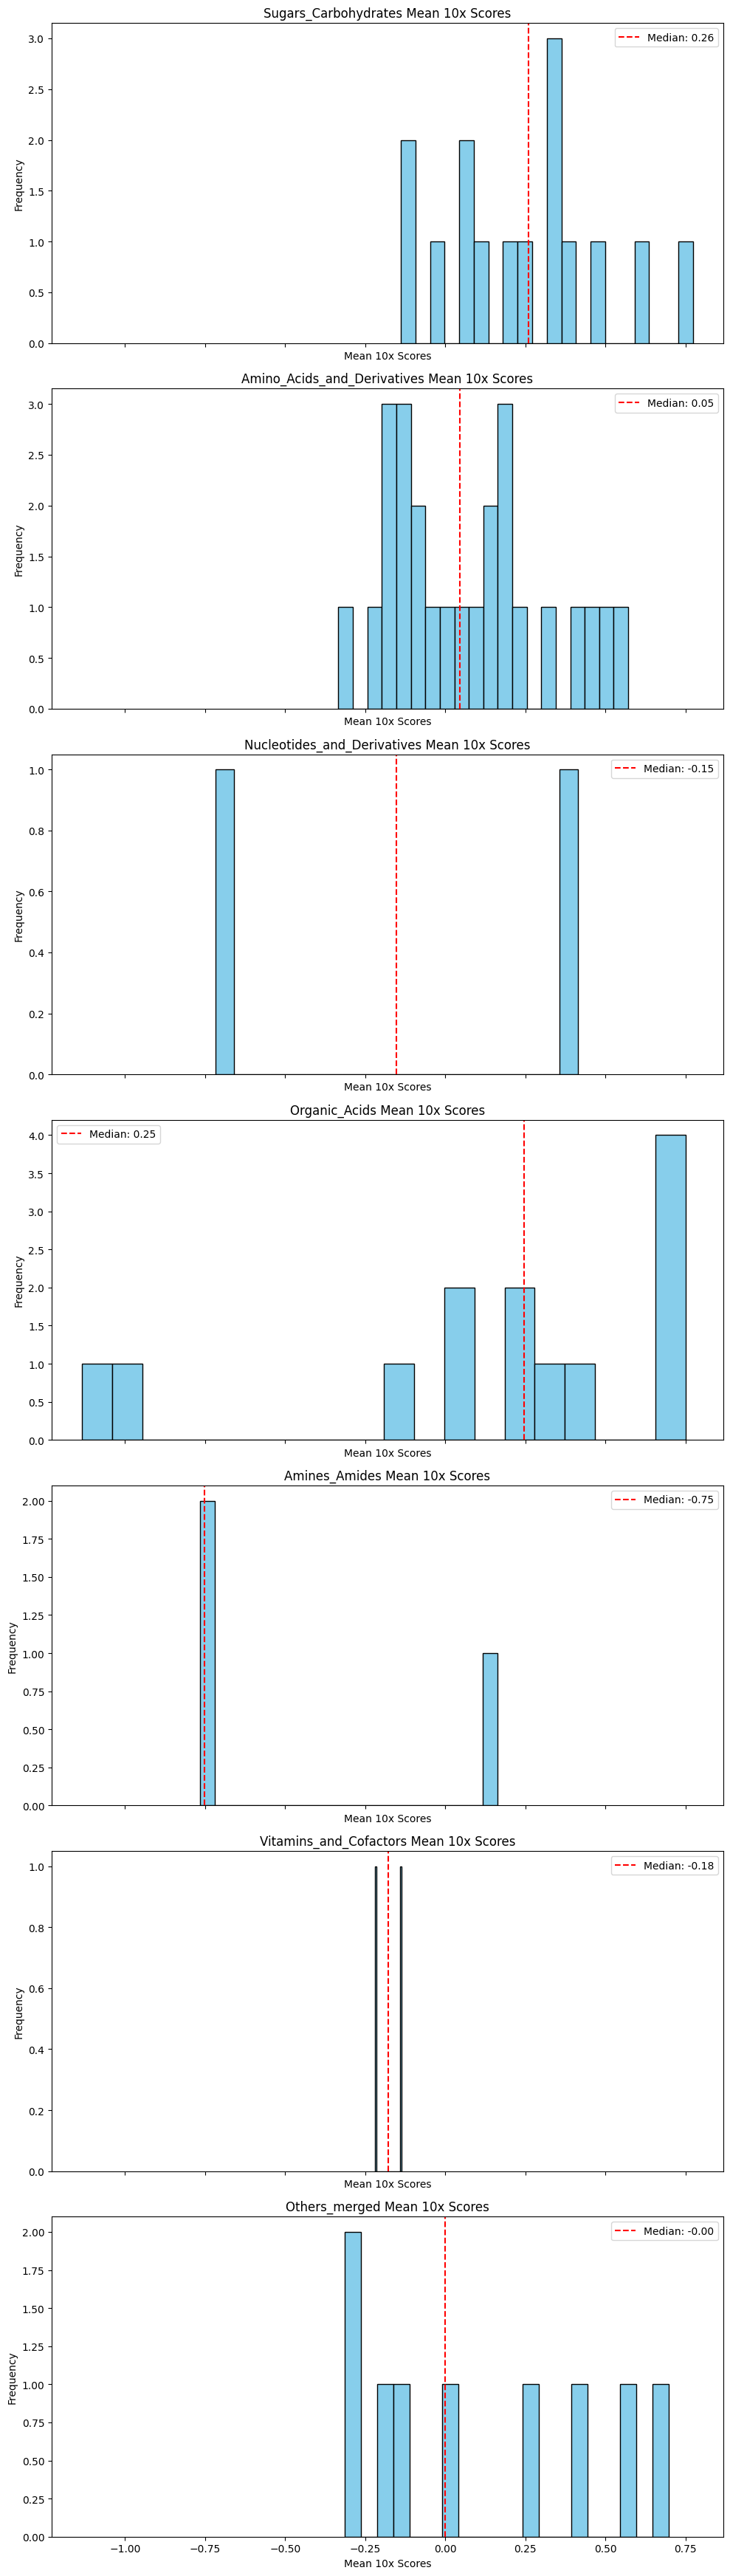

In [65]:
plot_subplots(gcms_results_by_group)

In [67]:
import math

def plot_grid_subplots(gcms_results_by_group):
    # Determine the grid size
    n_categories = len(gcms_results_by_group)
    grid_size = math.ceil(math.sqrt(n_categories))  # Square root to determine grid size, rounded up
    
    fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15), sharex=True, sharey=True)
    axs = axs.flatten()  # Flatten the 2D array of axes to easily iterate over it

    for ax, (cat, metabolites) in zip(axs, gcms_results_by_group.items()):
        # Extract mean_10x values for all metabolites in the category
        mean_10x_values = [info['mean_10x'] for metabolite, info in metabolites.items()]
        
        # Calculate the median for the mean_10x values
        median_value = np.median(mean_10x_values)

        # Plot histogram of mean_10x values
        ax.hist(mean_10x_values, bins=20, color='skyblue', edgecolor='black')
        
        # Mark the median with a red dashed line
        ax.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')
        
        # Set the title and labels
        ax.set_title(f'{cat}')
        ax.set_xlabel('Mean 10x Scores')
        ax.set_ylabel('Frequency')
        ax.legend()

    # Hide unused subplots if any
    for i in range(n_categories, grid_size**2):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Assuming gcms_results_by_group is your dictionary
# Example usage:
# plot_grid_subplots(gcms_results_by_group)


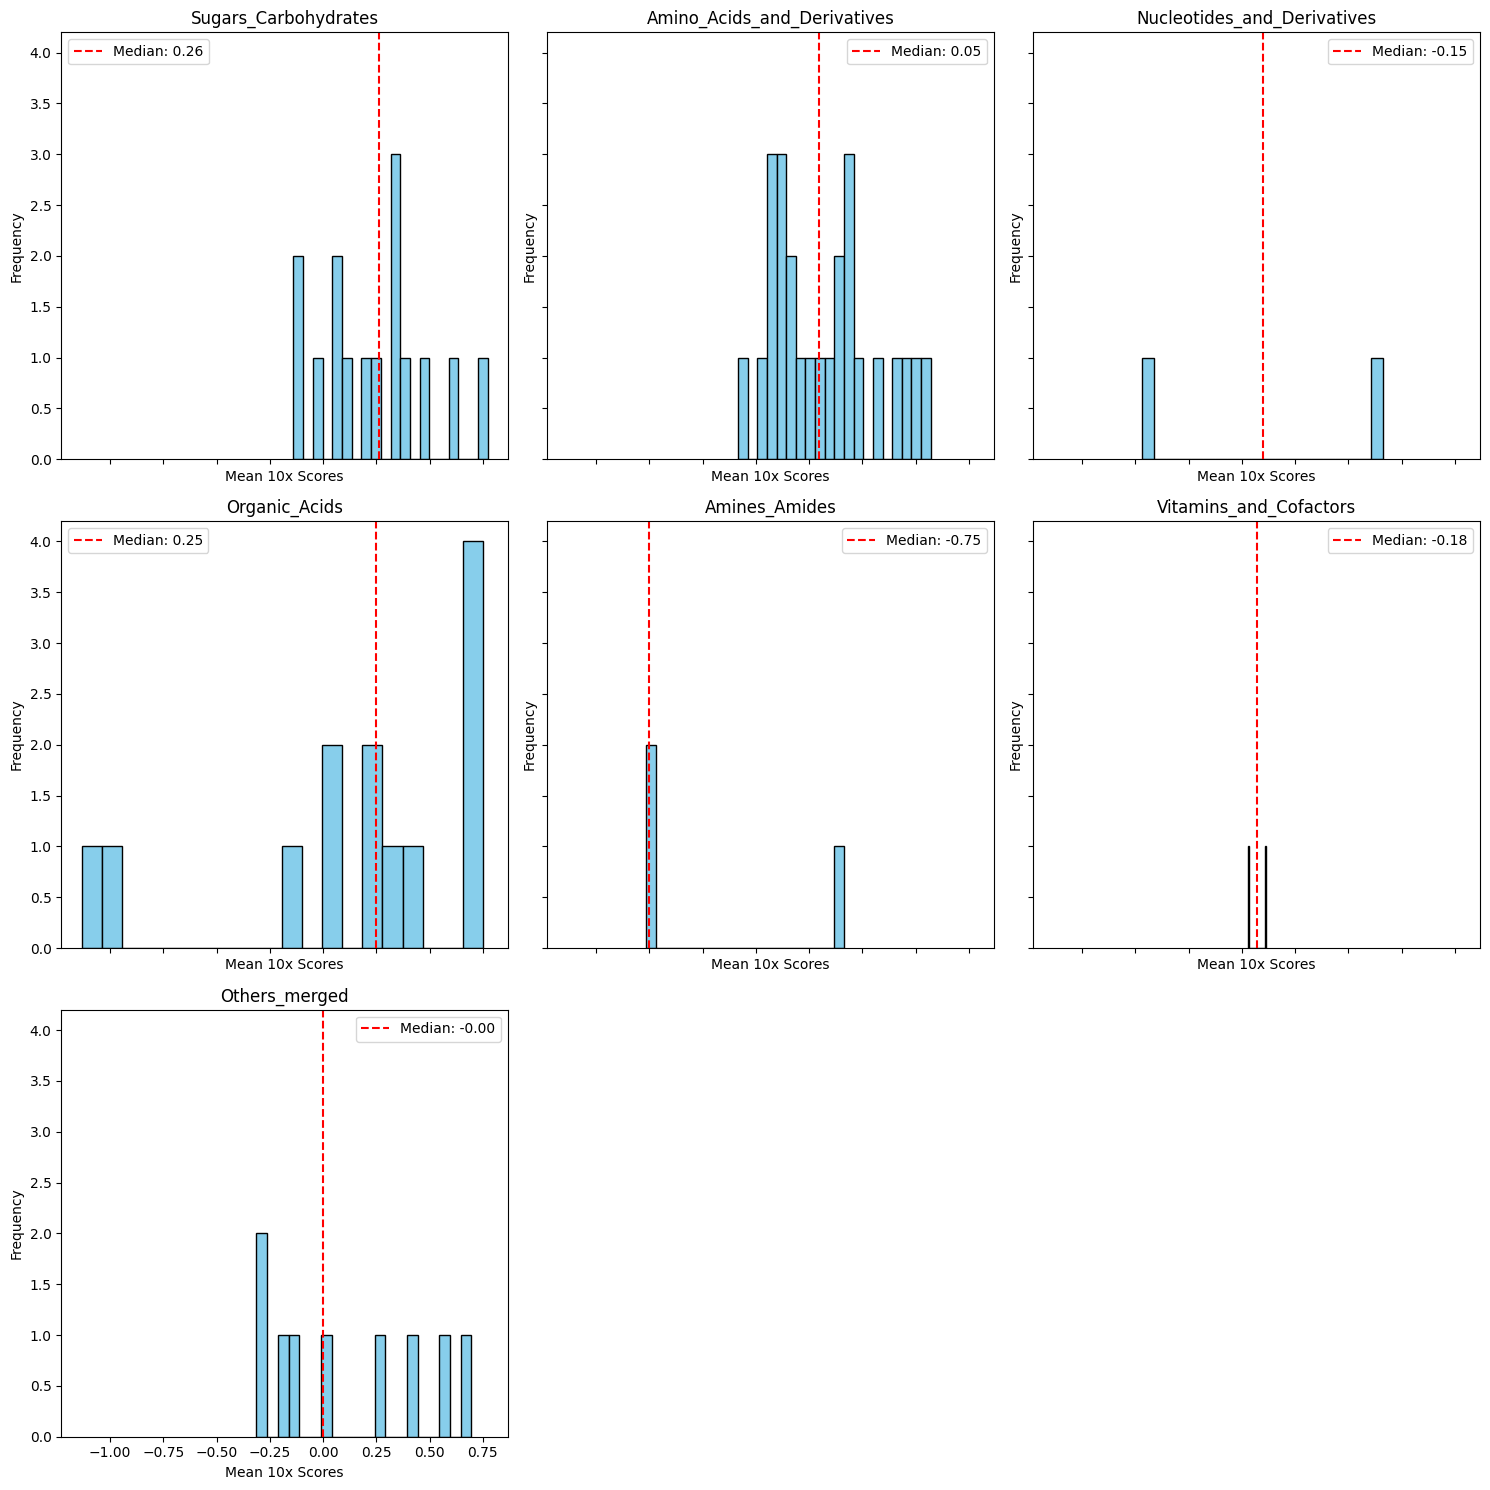

In [68]:
plot_grid_subplots(gcms_results_by_group)